In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [40]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

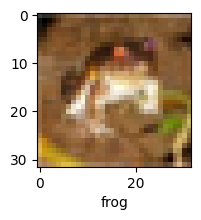

In [41]:
plot_sample(X_train, y_train, 0)

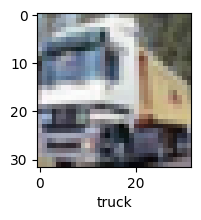

In [24]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 85ms/step - accuracy: 0.3048 - loss: 1.9298
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 84ms/step - accuracy: 0.4180 - loss: 1.6457
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 78ms/step - accuracy: 0.4517 - loss: 1.5516
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 82ms/step - accuracy: 0.4761 - loss: 1.4875
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.4941 - loss: 1.4348


In [ ]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4887 - loss: 1.4381


[1.446984887123108, 0.4853000044822693]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.51      0.55      1000
           1       0.71      0.42      0.53      1000
           2       0.39      0.36      0.38      1000
           3       0.35      0.38      0.36      1000
           4       0.37      0.50      0.43      1000
           5       0.44      0.31      0.36      1000
           6       0.53      0.51      0.52      1000
           7       0.56      0.55      0.56      1000
           8       0.54      0.70      0.61      1000
           9       0.50      0.60      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [25]:
cnn = models.Sequential([

    # cnn layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    # Dense layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3436 - loss: 1.7740
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5813 - loss: 1.1823
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6524 - loss: 0.9843
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6915 - loss: 0.8730
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7265 - loss: 0.7903
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7488 - loss: 0.7259
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7654 - loss: 0.6780
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7832 - loss: 0.6265
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7929 - loss: 0.5908
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8097 - loss: 0.5481


In [28]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7095 - loss: 0.8981


[0.8975504636764526, 0.7099000215530396]

In [29]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

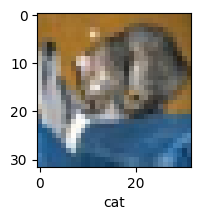

In [42]:
plot_sample(X_test, y_test, 0)

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.75656328e-02, 3.01306741e-03, 9.60530713e-03, 6.62889779e-01,
        1.82977633e-03, 7.95680508e-02, 6.25410490e-03, 7.36792863e-04,
        7.76721388e-02, 8.08653980e-02],
       [6.62819890e-04, 2.08189756e-01, 7.75948706e-07, 1.42239756e-07,
        5.22137249e-08, 1.30427917e-08, 1.50502366e-08, 3.31283312e-09,
        7.89754331e-01, 1.39204366e-03],
       [3.22322547e-02, 9.92136374e-02, 5.15993079e-03, 1.93546317e-03,
        3.10886855e-04, 2.32390841e-04, 3.76203284e-03, 2.00768161e-04,
        7.86790311e-01, 7.01623112e-02],
       [8.19179237e-01, 6.29280061e-02, 7.02522788e-03, 5.87961928e-04,
        6.73808798e-04, 9.31062023e-05, 2.26282267e-04, 3.84407349e-06,
        1.05901159e-01, 3.38154496e-03],
       [4.54241035e-06, 9.73056012e-05, 1.06686324e-01, 5.77050261e-03,
        6.15045249e-01, 3.78735363e-04, 2.71698147e-01, 6.86734438e-06,
        7.76453307e-05, 2.34645864e-04]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [38]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [43]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74      1000
           1       0.87      0.83      0.85      1000
           2       0.73      0.47      0.57      1000
           3       0.51      0.61      0.55      1000
           4       0.68      0.63      0.65      1000
           5       0.69      0.56      0.62      1000
           6       0.82      0.74      0.78      1000
           7       0.68      0.81      0.74      1000
           8       0.82      0.77      0.80      1000
           9       0.71      0.87      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

